In [65]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt


meta_dir = "/DATA4T/civitai/meta"

In [41]:
def get_all_items(path, num:int):
    ls = list()
    for i in range(1, num+1):
        with open(os.path.join(path, f"{i}.json"), "r") as f:
            dic = json.loads(f.read())
            ls += dic["items"]
    return ls

            
def find_model_id(items, id_num:int):
    for i in items:
        if id_num == i["id"]:
            return i
def find_model_name(items, name:str):
    for i in items:
        if name in i["name"]:
            return i

def get_all_stats(items, name):
    assert name in ["downloadCount", "rating", "ratingCount", "commentCount", "favoriteCount"]
    rt = list()
    for i in items:
        rt.append(i["stats"][name])
    return rt


In [26]:
all_item = get_all_items(meta_dir, 632)

In [42]:
it = find_model_id(all_item, 6424)

In [50]:
downloads = get_all_stats(all_item, "downloadCount")
favs = get_all_stats(all_item, "favoriteCount")

In [45]:
find_model_id(all_item, 11745)

median: 105.0
mean: 254.5135349058097


3591

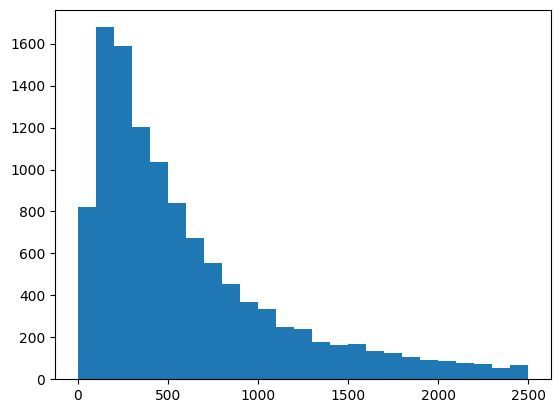

In [77]:
favs = np.array(favs)
hist,bins = np.histogram(favs,bins=list(range(0, int(10* np.mean(favs)), 100)))
plt.hist(downloads, bins = bins)
print("median:", np.median(favs))
print("mean:", np.mean(favs))
np.count_nonzero(favs > 200)

median: 499.0
mean: 1426.8063954408738


3782

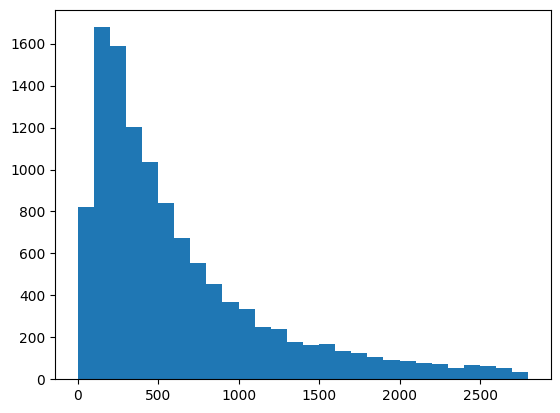

In [78]:
downloads = np.array(downloads)
hist,bins = np.histogram(downloads,bins=list(range(0, int(2* np.mean(downloads)), 100)))  
plt.hist(downloads, bins = bins)
print("median:", np.median(downloads))
print("mean:", np.mean(downloads))
np.count_nonzero(downloads > 900)

In [79]:
it = find_model_id(all_item, 6424)
it["modelVersions"][0].keys()

dict_keys(['id', 'modelId', 'name', 'createdAt', 'updatedAt', 'trainedWords', 'baseModel', 'earlyAccessTimeFrame', 'description', 'files', 'images', 'downloadUrl'])

In [82]:
type_list = []
for i in all_item:
    if i["type"] in type_list:
        continue
    else:
        type_list.append(i['type'])

In [83]:
type_list

['Checkpoint',
 'LORA',
 'Other',
 'TextualInversion',
 'Hypernetwork',
 'Poses',
 'Controlnet',
 'Wildcards',
 'LoCon',
 'AestheticGradient']

In [ ]:
type_to_sufix = {
    "Checkpoint": 
    "TextualInversion": "pt",
    ""
}